In [1]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns


In [2]:
Happy = pd.read_csv("/home/maverick/ML_self/Happy.csv")
Happy

,Unnamed: 0,name,artist,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo
0,0,"Happy - From ""Despicable Me 2""",Pharrell Williams,232720,0.647,0.21900,0.822,0.000000,0.0908,-4.662,0.1830,160.019
1,1,"Wow, I'm Not Crazy",AJR,196762,0.284,0.04380,0.609,0.000000,0.1770,-6.033,0.1230,85.386
2,2,All My Love,George Ezra,160950,0.449,0.13500,0.571,0.000000,0.2790,-5.206,0.0503,173.730
3,3,Ride,Naïka,201311,0.738,0.10900,0.752,0.000006,0.0905,-6.637,0.0573,96.985
4,4,You're Welcome,Various Artists,163893,0.788,0.29000,0.745,0.000000,0.0373,-7.072,0.2580,135.278
...,...,...,...,...,...,...,...,...,...,...,...,...
125,125,On The Floor,Jennifer Lopez,284866,0.730,0.10500,0.777,0.000478,0.0691,-5.194,0.0496,130.000
126,126,Firework,Katy Perry,227893,0.638,0.14100,0.832,0.000000,0.1130,-5.039,0.0490,124.071
127,127,Dynamite,Taio Cruz,202613,0.751,0.00379,0.783,0.000000,0.0360,-3.724,0.0859,119.975
128,128,Hips Don't Lie (feat. Wyclef Jean),Shakira,218093,0.778,0.28400,0.824,0.000000,0.4050,-5.892,0.0707,100.024


In [3]:
Euphon = pd.read_csv("/home/maverick/ML_self/Euphon.csv")
Euphon

,Unnamed: 0,name,artist,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo
0,0,Holy - Acoustic,Justin Bieber,205815,0.532,0.706,0.566,0.000000,0.1610,-6.511,0.0467,79.927
1,1,You Don't Even Know Me,Faouzia,179396,0.577,0.244,0.663,0.000077,0.0795,-4.788,0.0374,165.938
2,2,This Mountain,Faouzia,142259,0.675,0.215,0.930,0.000000,0.0638,-3.131,0.0690,129.965
3,3,Tears of Gold,Faouzia,176117,0.587,0.128,0.664,0.000000,0.3230,-5.698,0.0523,149.957
4,4,Out Of Love,Alessia Cara,227693,0.481,0.800,0.267,0.000000,0.2490,-9.249,0.0339,117.640
...,...,...,...,...,...,...,...,...,...,...,...,...
125,125,Wicked Game,Chris Isaak,289066,0.663,0.680,0.296,0.008370,0.0879,-18.090,0.0294,112.306
126,126,Romeo And Juliet,Dire Straits,360666,0.613,0.546,0.441,0.013200,0.0869,-11.999,0.0309,87.573
127,127,A Whiter Shade of Pale,Annie Lennox,316760,0.521,0.399,0.583,0.001740,0.3470,-8.451,0.0274,146.009
128,128,Wild Wood,Paul Weller,202266,0.594,0.418,0.224,0.015400,0.1140,-15.312,0.0482,153.726


In [4]:
Happy.columns

Index(['Unnamed: 0', 'name', 'artist', 'length', 'danceability',
       'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo'],
      dtype='object')

Text(0.5, 1.0, 'energy intensity across all songs in both playlists')

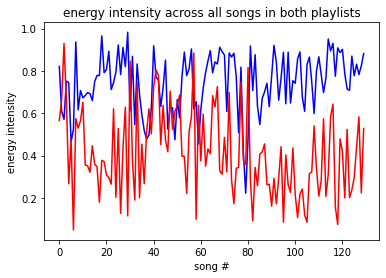

In [5]:
plt.plot(Happy.energy, color='blue')
plt.plot(Euphon.energy, color='red')
plt.xlabel("song #")
plt.ylabel("energy intensity")
plt.title("energy intensity across all songs in both playlists")

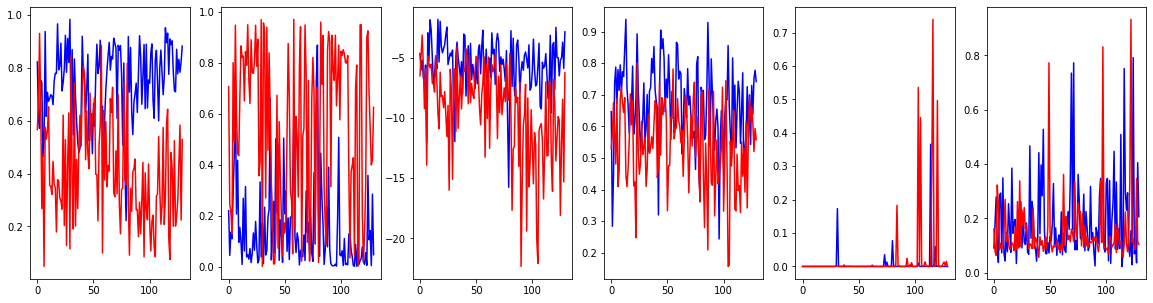

In [6]:
from turtle import color
from pyparsing import col


fig , axes = plt.subplots(1,6,figsize=(20,5))
axes[0].plot(Happy.energy,color='blue')
axes[0].plot(Euphon.energy,color='red')
axes[1].plot(Happy.acousticness,color='blue')
axes[1].plot(Euphon.acousticness,color='red')
axes[2].plot(Happy.loudness,color='blue')
axes[2].plot(Euphon.loudness,color='red')
axes[3].plot(Happy.danceability,color='blue')
axes[3].plot(Euphon.danceability,color='red')
axes[4].plot(Happy.instrumentalness,color='blue')
axes[4].plot(Euphon.instrumentalness,color='red')
axes[5].plot(Happy.liveness,color='blue')
axes[5].plot(Euphon.liveness,color='red')


In [7]:
Happy_Eupho = pd.read_csv("/home/maverick/ML_self/Happy_Eupho.csv")
Happy_Eupho

,acousticness,energy,loudness,target
0,0.2190,0.822,-4.662,1
1,0.0438,0.609,-6.033,1
2,0.1350,0.571,-5.206,1
3,0.1090,0.752,-6.637,1
4,0.2900,0.745,-7.072,1
...,...,...,...,...
255,0.6800,0.296,-18.090,0
256,0.5460,0.441,-11.999,0
257,0.3990,0.583,-8.451,0
258,0.4180,0.224,-15.312,0


In [8]:
Standardized_data = Happy_Eupho.drop('target',axis=1)
Standardized_data

,acousticness,energy,loudness
0,0.2190,0.822,-4.662
1,0.0438,0.609,-6.033
2,0.1350,0.571,-5.206
3,0.1090,0.752,-6.637
4,0.2900,0.745,-7.072
...,...,...,...
255,0.6800,0.296,-18.090
256,0.5460,0.441,-11.999
257,0.3990,0.583,-8.451
258,0.4180,0.224,-15.312


In [9]:
from sklearn.preprocessing import StandardScaler


Standardized_data = StandardScaler().fit_transform(Standardized_data)

Data_with_features = pd.DataFrame(Standardized_data)

In [10]:
Data_with_features.head()

,0,1,2
0,-0.401809,1.025628,0.766198
1,-0.946861,0.131022,0.389802
2,-0.663135,-0.028580,0.616848
3,-0.744022,0.731626,0.223979
4,-0.180925,0.702226,0.104554


In [11]:
Data_with_features.describe

<bound method NDFrame.describe of             0         1         2
0   -0.401809  1.025628  0.766198
1   -0.946861  0.131022  0.389802
2   -0.663135 -0.028580  0.616848
3   -0.744022  0.731626  0.223979
4   -0.180925  0.702226  0.104554
..        ...       ...       ...
255  1.032377 -1.183588 -2.920341
256  0.615499 -0.574584 -1.248111
257  0.158177  0.021821 -0.274039
258  0.217287 -1.485990 -2.157665
259  0.861270 -0.209181  0.326108

[260 rows x 3 columns]>

In [12]:
Data_with_features.columns

RangeIndex(start=0, stop=3, step=1)

In [13]:
Data_with_features.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [14]:
Data_with_features.shape

(260, 3)

In [15]:
Data_with_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       260 non-null    float64
 1   1       260 non-null    float64
 2   2       260 non-null    float64
dtypes: float64(3)
memory usage: 6.2 KB


In [16]:
from sklearn.model_selection import train_test_split

X = Data_with_features
y = Happy_Eupho['target']

In [17]:
X.head()

,0,1,2
0,-0.401809,1.025628,0.766198
1,-0.946861,0.131022,0.389802
2,-0.663135,-0.028580,0.616848
3,-0.744022,0.731626,0.223979
4,-0.180925,0.702226,0.104554


In [18]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [19]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)

In [20]:
from sklearn.neighbors import KNeighborsClassifier


K_NN = KNeighborsClassifier(n_neighbors=7,p=2,metric='euclidean')
K_NN.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [21]:
testing = K_NN.predict(X_test)
testing

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0])

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,testing))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        39
           1       0.80      0.92      0.86        39

    accuracy                           0.85        78
   macro avg       0.85      0.85      0.85        78
weighted avg       0.85      0.85      0.85        78



In [26]:
error_rate = []
for i in range(1,40):
    K_NN = KNeighborsClassifier(n_neighbors=i,p=2,metric='euclidean')
    K_NN.fit(X_train,y_train)
    testing_i = K_NN.predict(X_test)
    error_rate.append(np.mean(testing_i!=y_test))
    
    

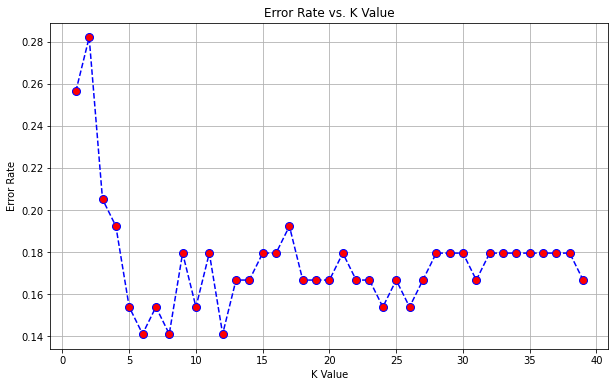

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.grid()
plt.show()

In [31]:
K_NN = KNeighborsClassifier(n_neighbors=8,p=2,metric='euclidean')
K_NN.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [32]:
testing = K_NN.predict(X_test)

In [33]:
print(classification_report(y_test,testing))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85        39
           1       0.82      0.92      0.87        39

    accuracy                           0.86        78
   macro avg       0.86      0.86      0.86        78
weighted avg       0.86      0.86      0.86        78

